In [38]:
import time
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt

CoordA = np.ones((1000, 3), float)
CoordB = np.ones((1000, 3), float)

ChargeA = np.ones((1000, 1), float)
ChargeB = np.ones((1000, 1), float)

In [46]:
### spatial only
s_old = []
s_new = []
for _ in range(10):
# old version
    t0 = time.time()
    SimScore = np.sum(np.exp(-cdist(CoordA, CoordB, "euclidean")**2/0.1**2))
    t1 = time.time()

    s_old.append(t1-t0)

    # new version
    t2 = time.time()
    SimScore = np.sum(np.reciprocal(np.cosh(0.5*cdist(CoordA, CoordB, "euclidean"))))
    t3 = time.time()

    s_new.append(t3-t2)
    print(t1-t0, t3-t2)

0.021936416625976562 0.01689934730529785
0.020339012145996094 0.017017126083374023
0.018969297409057617 0.01630401611328125
0.019435644149780273 0.01520991325378418
0.0180511474609375 0.01826930046081543
0.018403053283691406 0.01735997200012207
0.01756143569946289 0.0163118839263916
0.020426273345947266 0.016253232955932617
0.02066969871520996 0.016819477081298828
0.020292282104492188 0.0165860652923584


In [47]:
### spatial + electrostatic

se_old = []
se_new = []
for _ in range(10):
    # old version
    t0 = time.time()
    SimScore = np.sum(np.exp(-cdist(ChargeA, ChargeB, "euclidean")**2/0.1**2) * np.exp(-cdist(CoordA, CoordB, "euclidean")**2/0.1**2))
    t1 = time.time()

    se_old.append(t1-t0)

    # new version
    t2 = time.time()
    SimScore = np.sum( np.reciprocal(np.cosh(0.5*cdist(CoordA, CoordB, "euclidean")) * np.cosh(5*cdist(ChargeA, ChargeB, "euclidean"))))
    t3 = time.time()

    se_new.append(t3-t2)
    print(t1-t0, t3-t2)

0.06186652183532715 0.03298759460449219
0.03956890106201172 0.02603292465209961
0.034311771392822266 0.026865243911743164
0.033116817474365234 0.02390289306640625
0.03201866149902344 0.02511906623840332
0.0322728157043457 0.02881789207458496
0.030657529830932617 0.0201876163482666
0.027027368545532227 0.018770456314086914
0.026933670043945312 0.02013111114501953
0.026956796646118164 0.021875858306884766


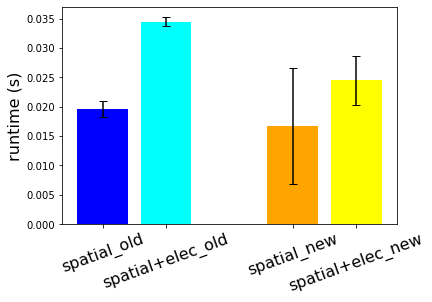

In [50]:
s_old_mean = np.mean(s_old)
s_new_mean = np.mean(s_new)
se_old_mean = np.mean(se_old)
se_new_mean = np.mean(se_new)

s_old_std = np.std(s_old)
s_new_std = np.std(s_new)
se_old_std = np.std(se_old)
se_new_std = np.std(se_new)

plt.bar([0, 1, 3, 4], [s_old_mean, se_old_mean, s_new_mean, se_new_mean], yerr=[s_old_std, s_new_std, se_old_std, se_new_std], color=['blue', 'cyan', 'orange', 'yellow'], capsize=4.0)
plt.xticks([0, 1, 3, 4], labels=["spatial_old", "spatial+elec_old", "spatial_new", "spatial+elec_new"], rotation=20, fontsize=16)
plt.ylabel("runtime (s)", fontsize=16)
# plt.errorbar([0, 1, 3, 4], [s_old_mean, se_old_mean, s_new_mean, se_new_mean])
plt.show()

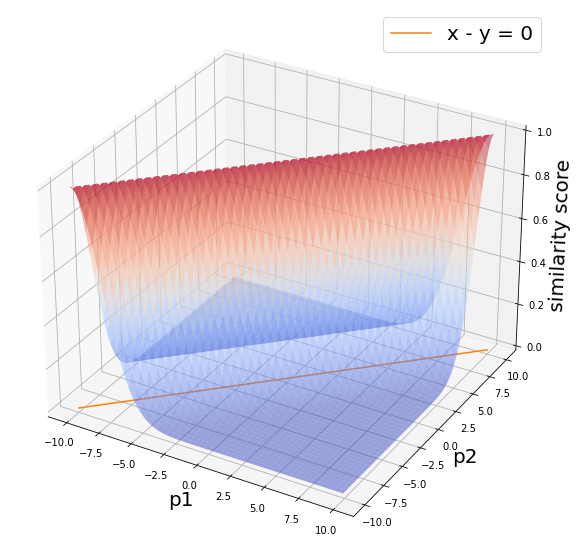

In [36]:
from matplotlib import cm

x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
xx, yy = np.meshgrid(x, y)
z = np.exp(-(xx-yy)**2/3**2)

plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

ax.plot_surface(xx, yy, z, cmap=cm.coolwarm, alpha=0.5)
ax.set_xlabel("p1", fontsize=20)
ax.set_ylabel("p2", fontsize=20)
ax.set_zlabel("similarity score", fontsize=20)
ax.plot([-10, 10], [-10, 10], [0, 0], label="x - y = 0")
plt.legend(fontsize=20)
plt.show()

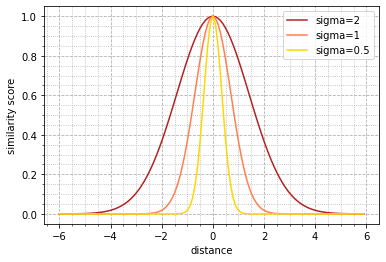

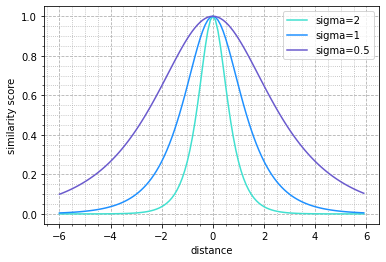

In [87]:
# compare function plot
x = np.arange(-6, 6, 0.1)
# old
y_old0 = np.exp(-x**2/2**2)
y_old1 = np.exp(-x**2/1**2)
y_old2 = np.exp(-x**2/0.5**2)

# plt.set_xticks(xx, minor=True)
plt.minorticks_on()

plt.plot(x, y_old0, label="sigma=2", color='firebrick')
plt.plot(x, y_old1, label="sigma=1", color='coral')
plt.plot(x, y_old2, label="sigma=0.5", color='gold')

plt.grid(which='major', linestyle='--')
plt.grid(which='minor', linestyle=':')

plt.xlabel("distance")
plt.ylabel("similarity score")
plt.legend()

plt.show()

# new
y_new0 = np.reciprocal(np.cosh(2*x))
y_new1 = np.reciprocal(np.cosh(1*x))
y_new2 = np.reciprocal(np.cosh(0.5*x))

plt.minorticks_on()
plt.plot(x, y_new0, label="sigma=2", color='turquoise')
plt.plot(x, y_new1, label="sigma=1", color='dodgerblue')
plt.plot(x, y_new2, label="sigma=0.5", color='slateblue')

plt.grid(which='major', linestyle='--')
plt.grid(which='minor', linestyle=':')

plt.xlabel("distance")
plt.ylabel("similarity score")
plt.legend()

plt.show()